In [8]:
import pandas as pd #Data manupulation lib
from matplotlib import pyplot as plt #data-visualization
import seaborn as sb

In [2]:
df=pd.read_csv("/home/manish/Desktop/dataset/AppleStore.csv")

In [3]:
df.head() #to see first 5 rows of dataset

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
df.info() #detailed information about what dataset contains

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [7]:
rating=df.loc[:,["track_name","prime_genre","user_rating","rating_count_tot","price"]]
rating=rating.sort_values(by=["user_rating","rating_count_tot"],ascending=False)
rating.head()

,track_name,prime_genre,user_rating,rating_count_tot,price
1104,Head Soccer,Games,5.0,481564,0.00
302,Plants vs. Zombies,Games,5.0,426463,0.99
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,Games,5.0,386521,0.00
2177,Geometry Dash Lite,Games,5.0,370370,0.00
498,Infinity Blade,Games,5.0,326482,0.99


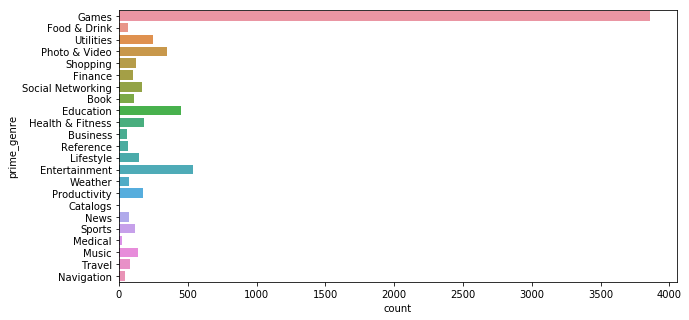

In [12]:
#Plotting

plt.figure(figsize=(10,5))
sb.countplot(y=rating["prime_genre"])

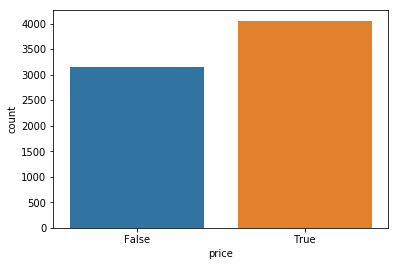

In [13]:
sb.countplot(rating["price"]==0)

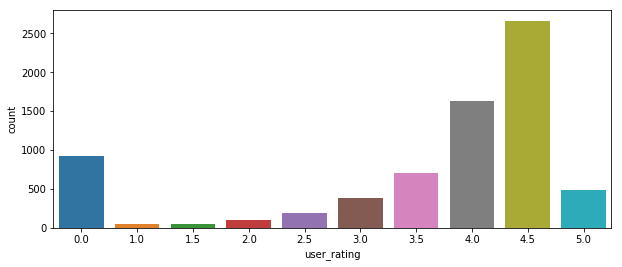

In [14]:
plt.figure(figsize=(10,4))
sb.countplot(rating["user_rating"])

In [15]:
rating["rating_count_tot"].mean()

12892.907183548701

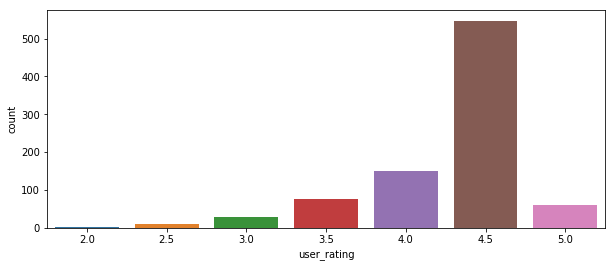

In [18]:
rating=rating[rating["rating_count_tot"]>rating["rating_count_tot"].mean()]

plt.figure(figsize=(10,4))
sb.countplot(rating["user_rating"])

In [21]:
trending=df.loc[:,["track_name","prime_genre","user_rating_ver","rating_count_ver","price"]]

In [23]:
trending=trending[trending["rating_count_ver"]>trending["rating_count_ver"].mean()]

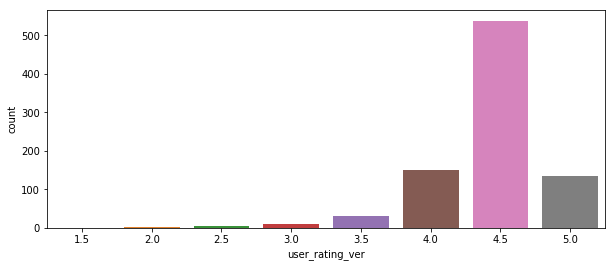

In [24]:
plt.figure(figsize=(10,4))
sb.countplot(trending["user_rating_ver"])

In [25]:
trending=trending.sort_values(by=["user_rating_ver","rating_count_ver"],ascending=False)

In [27]:
trending.head(10)

,track_name,prime_genre,user_rating_ver,rating_count_ver,price
498,Infinity Blade,Games,5.0,177050,0.99
545,"Zappos: shop shoes & clothes, fast free shipping",Shopping,5.0,39452,0.00
479,shopkick - Shopping Rewards & Discounts,Shopping,5.0,29363,0.00
3616,Browser and File Manager for Documents,Utilities,5.0,27213,0.00
2989,The Room Three,Games,5.0,21769,4.99
6688,Tricky Test 2™: Genius Brain?,Games,5.0,19952,0.00
384,▻Sudoku,Games,5.0,17119,0.00
3067,AdVenture Capitalist,Games,5.0,11269,0.00
3643,Block Craft 3D: Building Simulator Game For Free,Games,5.0,11001,0.00
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,Games,5.0,10332,0.00


In [28]:
#Top trending free games
top_free=trending[(trending["prime_genre"]=="Games") & (trending["price"]==0)]
top_free.head(10)

,track_name,prime_genre,user_rating_ver,rating_count_ver,price
6688,Tricky Test 2™: Genius Brain?,Games,5.0,19952,0.0
384,▻Sudoku,Games,5.0,17119,0.0
3067,AdVenture Capitalist,Games,5.0,11269,0.0
3643,Block Craft 3D: Building Simulator Game For Free,Games,5.0,11001,0.0
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,Games,5.0,10332,0.0
3180,Tap Titans,Games,5.0,8763,0.0
1104,Head Soccer,Games,5.0,8518,0.0
3784,"Egg, Inc.",Games,5.0,8442,0.0
6663,Super Cat Tales,Games,5.0,7421,0.0
4969,Good Knight Story,Games,5.0,6282,0.0


In [29]:
#Top treding paid games
top_paid=trending[(trending["prime_genre"]=="Games") & (trending["price"]!=0)]
top_paid.head(10)

,track_name,prime_genre,user_rating_ver,rating_count_ver,price
498,Infinity Blade,Games,5.0,177050,0.99
2989,The Room Three,Games,5.0,21769,4.99
4263,Super Sharp,Games,5.0,7776,1.99
6761,Zip—Zap,Games,5.0,3307,1.99
605,Dungeon Raid,Games,5.0,2927,0.99
2064,The Room Two,Games,5.0,2858,1.99
2280,A Dark Room,Games,5.0,2749,0.99
668,Legendary Wars,Games,5.0,2253,0.99
2233,Optical Inquisitor 17+,Games,5.0,1922,0.99
530,Spider Solitaire by MobilityWare,Games,5.0,1862,4.99
